# Logistic Regression and Decision Boundary Exploration

This notebook explores the decision boundary and how it relates to logistic regression algorithm.

In [14]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import importlib


# Custom scripts imports
# Adding the directory to sys.path
sys.path.insert(0, os.path.abspath('../'))

# Import the modules after
from src.visualization import visualize
from src.models import predict_model

# Now reload using the module reference, for future changes.
importlib.reload(visualize)
importlib.reload(predict_model)

# Now, import the function from the reloaded module
from src.visualization.visualize import draw_threshold, plot_data
from src.models.predict_model import sigmoid

We can use a dummy dataset for training data, as follows:

In [15]:
# Numpy array of two features and 6 samples
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
'''
The reshape(-1, 1) method is used to reshape the 1D array into a 2D array. 
The -1 indicates that the number of rows is inferred from the length of the array, 
while 1 specifies that there should be 1 column. This results in a 2D array with 6 rows and 1 column.
'''
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

The data can be shown in a plot to help visualizing the dataset and target values:

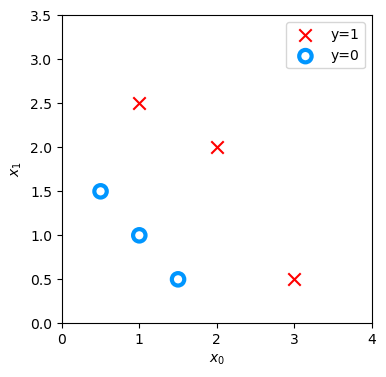

In [16]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
plot_data(X, y, ax)
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

We have then the following logistic regression model, on which to train it with the data defined above:
  $f(x) = g(w_0x_0+w_1x_1 + b)$
  
  where $g(z) = \frac{1}{1+e^{-z}}$, the sigmoid function

We can assume, for the sake of this exploration, that we have trained the model and obtained the following parameter values:
  
  $b = -3, w_0 = 1, w_1 = 1$. That is,

  $f(x) = g(x_0+x_1-3)$

### Logistic Regression Model and Decision Boundary Overview

- For logistic regression, the model is:

  $$f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

 ... where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}$

and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$

 * The interpretation of the output of the model ($f_{\mathbf{w},b}(x)$) is the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, the following can be interpreted too -

  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$
  
  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$
  
  
* Plotting the sigmoid function can help seeing where $g(z) >= 0.5$

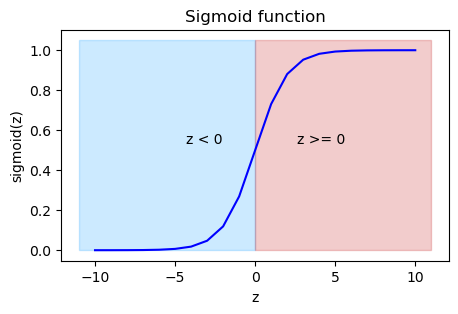

In [19]:
# Plotting sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10,11)
fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_threshold(ax,0)

The **following observations can be made from the previous plot display:**

* $g(z) >= 0.5$ for $z >=0$

* For the logistic regression model, $z = \mathbf{w} \cdot \mathbf{x} + b$. Therefore,

  if $\mathbf{w} \cdot \mathbf{x} + b >= 0$, the model predicts $y=1$
  
  if $\mathbf{w} \cdot \mathbf{x} + b < 0$, the model predicts $y=0$

### Plotting the Decision Boundary

If the previously considered parameters values are used, then the logistic regression model takes the following shape:

$f(\mathbf{x}) = g(-3 + x_0+x_1)$

This model predicts $y=1$ if $-3 + x_0+x_1 >= 0$

To observe it graphically, we can start by plotting $-3 + x_0+x_1 = 0$, which is equivalent to $x_1 = 3 - x_0$ or $3 = x_0 +x_1$.

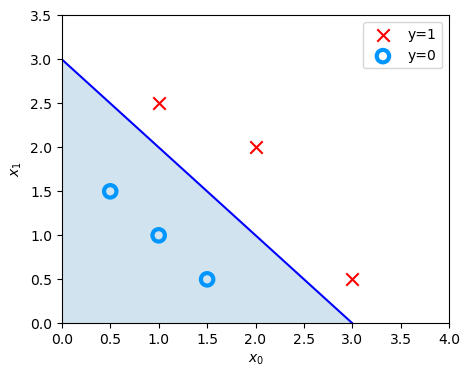

In [20]:
# Using values between 0 and 6
x0 = np.arange(0, 6)
x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))

# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(X,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

* In the above plot, the blue line represents the line $x_0 + x_1 - 3 = 0$ and it should intersect the x1 axis at 3 (if set $x_1$ = 3, $x_0$ = 0) and the x0 axis at 3 (if set $x_1$ = 0, $x_0$ = 3). 


* The shaded region represents $-3 + x_0+x_1 < 0$. The region above the line is $-3 + x_0+x_1 > 0$.


* Any point in the shaded region (under the line) is classified as $y=0$.  Any point on or above the line is classified as $y=1$. This line is known as the "decision boundary".

Also, by using higher order polynomial terms (eg: $f(x) = g( x_0^2 + x_1 -1)$, more complex non-linear boundaries can be formulated.